In [1]:
import pandas as pd
import numpy as np

In [45]:
df = pd.read_csv('new.csv')

In [46]:
df = df.sort_values(by='CAL_DT').reset_index(drop=True)
df.CAL_DT.unique()

array(['2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
       '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
       '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
       '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31'],
      dtype=object)

In [47]:
df['CAL_DT'] = pd.to_datetime(df['CAL_DT'])
df_monthly = df.groupby('CAL_DT')['DEVICE_COUNT'].sum().to_frame()
df_monthly = df_monthly.sort_index()

# Try One

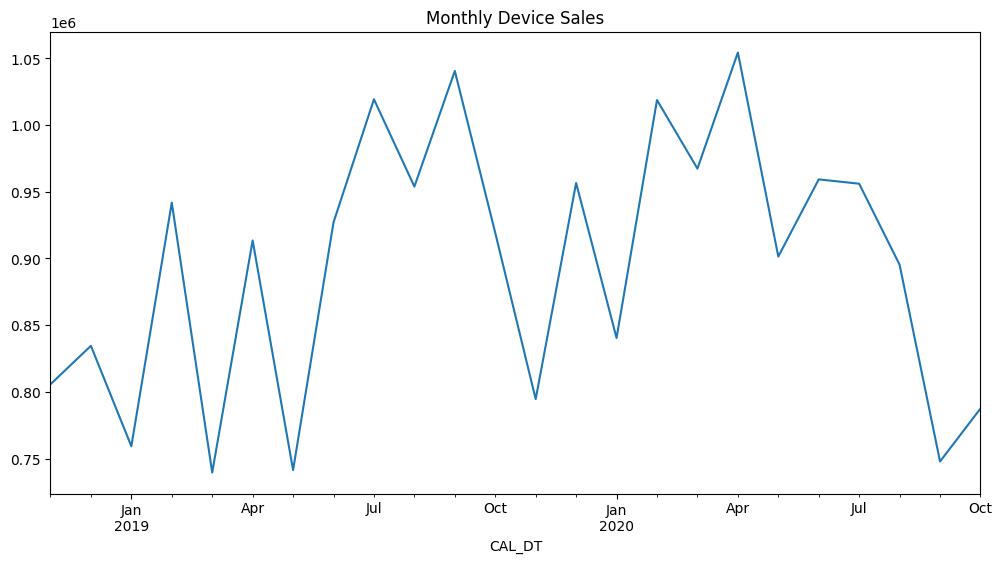

In [5]:
import matplotlib.pyplot as plt

df_monthly['DEVICE_COUNT'].plot(figsize=(12,6), title='Monthly Device Sales')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_monthly['DEVICE_COUNT'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.9692462255541943
p-value: 0.30021817205712875


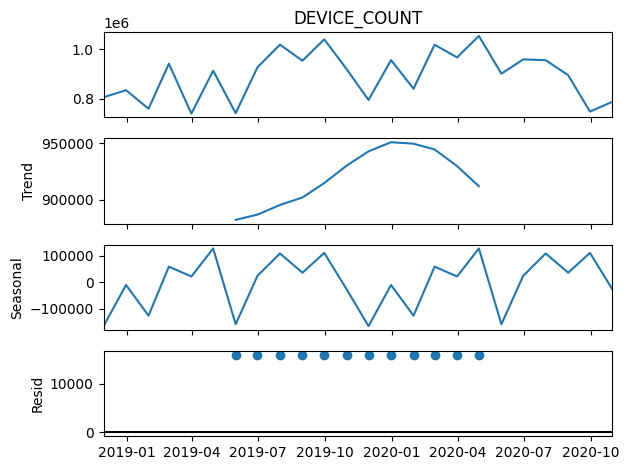

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_monthly['DEVICE_COUNT'], model='additive')
decomposition.plot()
plt.show()

# ARIMA

                                     SARIMAX Results                                      
Dep. Variable:                       DEVICE_COUNT   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -140.606
Date:                            Wed, 16 Jul 2025   AIC                            291.212
Time:                                    08:55:00   BIC                            293.201
Sample:                                11-30-2018   HQIC                           289.958
                                     - 10-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9406      2.506     -0.375      0.707      -5.852       3.971
ma.L1          0.7328      2.209   

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


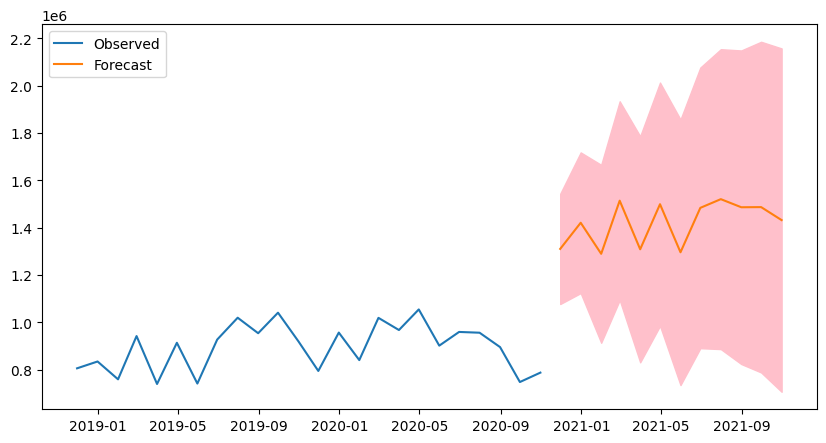

In [11]:
import statsmodels.api as sm

# Use SARIMAX for seasonal ARIMA
model = sm.tsa.statespace.SARIMAX(df_monthly['DEVICE_COUNT'],
                                  order=(1,1,1),
                                  seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df_monthly.index, df_monthly['DEVICE_COUNT'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()
plt.show()


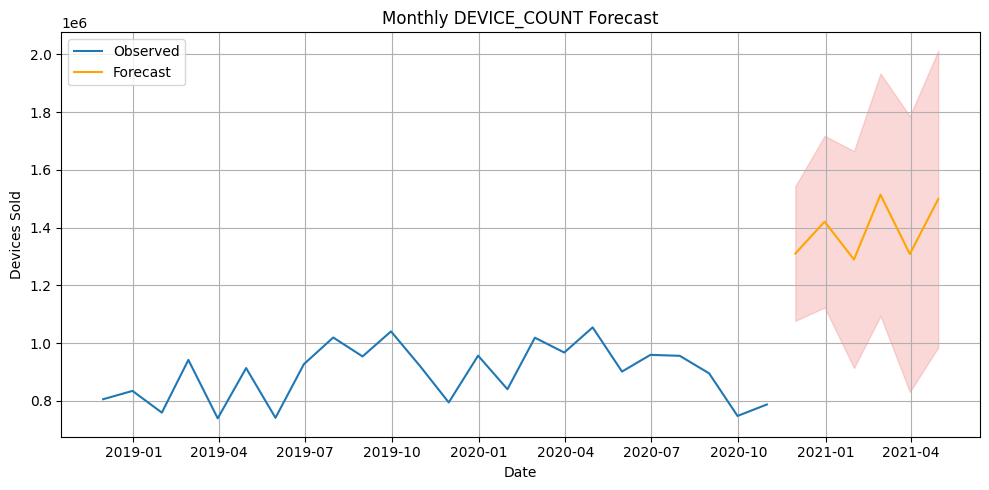

In [12]:
# Forecast 6 months ahead
n_periods = 6
forecast = results.get_forecast(steps=n_periods)
forecast_ci = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['DEVICE_COUNT'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='lightcoral', alpha=0.3)
plt.title('Monthly DEVICE_COUNT Forecast')
plt.xlabel('Date')
plt.ylabel('Devices Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# SARIMA

In [12]:
df.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2018-11-30,vibe k4 note a7010,lenovo vibe k4 note a7010,lenovo,google,android,smartphone,y,y,y,y,y,y,y,Female,18-25,PHL,Philippines,Non-Saudi,3.0
26,2018-11-30,a33,oppo a33,oppo,google,android,smartphone,y,y,y,y,y,y,y,Male,>55,PHL,Philippines,Non-Saudi,3.0
25,2018-11-30,x2-02,nokia x2-02,nokia,nokia,proprietary,mobile phone,y,n,n,n,y,n,y,NaN,18-25,BGD,Bangladesh,Non-Saudi,3.0
3733,2018-11-30,110,gresso 110,gresso,dinuotong technology,proprietary,mobile phone,y,n,n,n,y,n,n,Male,>55,YEM,Yemen,Non-Saudi,9.0
1,2018-11-30,b25,cat b25,cat,cect,proprietary,mobile phone,y,n,n,n,y,n,y,Male,>55,YEM,Yemen,Non-Saudi,1.0


In [13]:

# Convert CAL_DT to datetime
df['CAL_DT'] = pd.to_datetime(df['CAL_DT'])

# Sort by date
df = df.sort_values('CAL_DT')

# Set the index to CAL_DT for time series modeling
df.set_index('CAL_DT', inplace=True)

# Make sure the data is monthly
df = df.resample('M').sum()  # Assuming DEVICE_COUNT is the column

C:\Users\ma.aldawsari\AppData\Local\Temp\ipykernel_11228\43249169.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample('M').sum()  # Assuming DEVICE_COUNT is the column


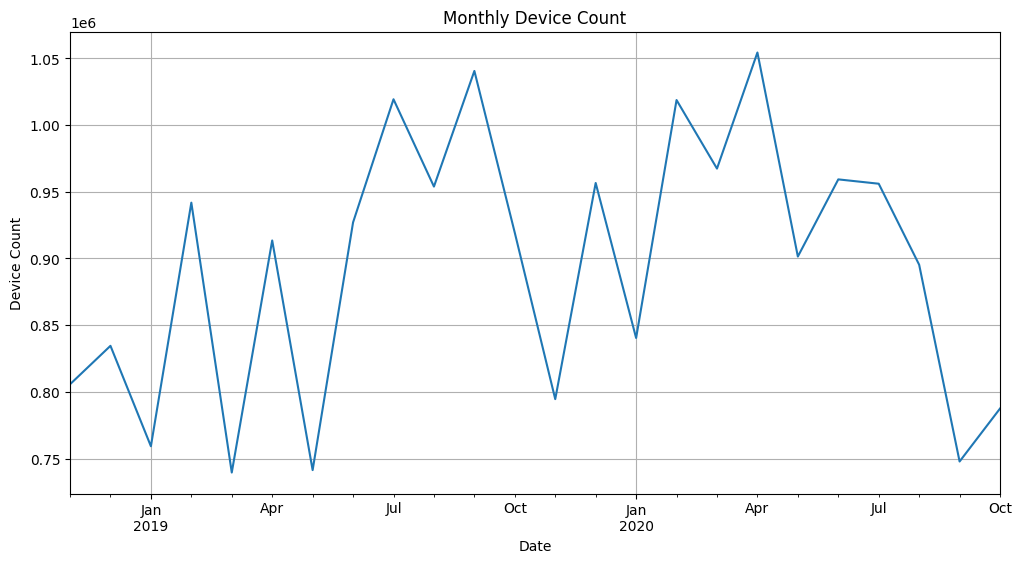

In [14]:
import matplotlib.pyplot as plt

df['DEVICE_COUNT'].plot(figsize=(12, 6), title="Monthly Device Count")
plt.xlabel("Date")
plt.ylabel("Device Count")
plt.grid(True)
plt.show()


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the model: you can tune (p,d,q)x(P,D,Q,seasonal_period)
model = SARIMAX(df['DEVICE_COUNT'], 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       DEVICE_COUNT   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 16 Jul 2025   AIC                             10.000
Time:                                    09:59:53   BIC                                nan
Sample:                                11-30-2018   HQIC                               nan
                                     - 10-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2607         -0        inf      0.000      -0.261      -0.261
ma.L1         -0.1602         -0   

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tools\eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3016: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
c:\Users\ma.aldawsari\AppData\Local\anaconda3\env

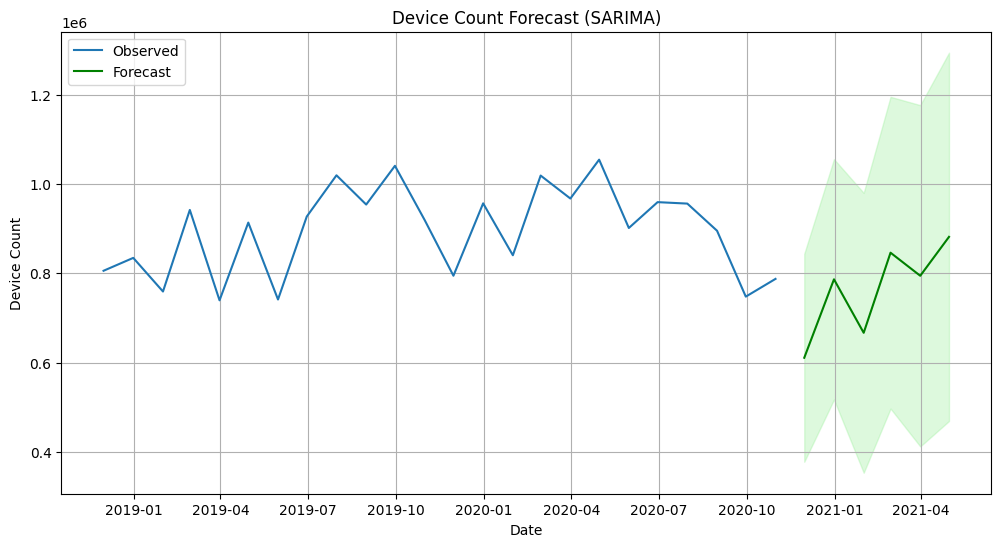

In [16]:
forecast = results.get_forecast(steps=6)
forecast_df = forecast.summary_frame()

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df['DEVICE_COUNT'], label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], 
                 color='lightgreen', alpha=0.3)
plt.legend()
plt.title("Device Count Forecast (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Device Count")
plt.grid(True)
plt.show()


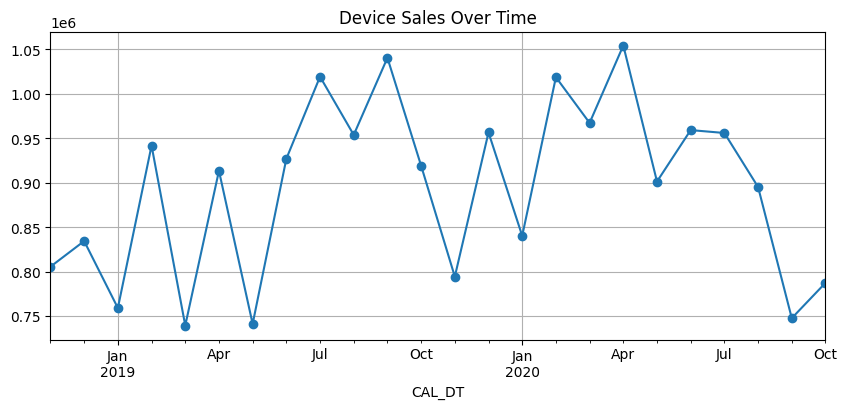

count    2.400000e+01
mean     8.947865e+05
std      9.916382e+04
min      7.394858e+05
25%      8.028745e+05
50%      9.163563e+05
75%      9.572702e+05
max      1.054412e+06
Name: DEVICE_COUNT, dtype: float64
DEVICE_COUNT
8.056627e+05    1
8.344858e+05    1
7.477520e+05    1
8.952827e+05    1
9.560350e+05    1
9.592890e+05    1
9.014280e+05    1
1.054412e+06    1
9.673728e+05    1
1.018779e+06    1
8.403710e+05    1
9.565973e+05    1
7.945100e+05    1
9.192085e+05    1
1.040596e+06    1
9.538943e+05    1
1.019365e+06    1
9.270540e+05    1
7.413082e+05    1
9.135042e+05    1
7.394858e+05    1
9.418322e+05    1
7.591855e+05    1
7.874647e+05    1
Name: count, dtype: int64


In [17]:
df['DEVICE_COUNT'].plot(marker='o', figsize=(10,4), title="Device Sales Over Time")
plt.grid(True)
plt.show()

print(df['DEVICE_COUNT'].describe())
print(df['DEVICE_COUNT'].value_counts())

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['DEVICE_COUNT'], order=(1,1,1), seasonal_order=(0,0,0,0))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:           DEVICE_COUNT   No. Observations:                   24
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -302.085
Date:                Wed, 16 Jul 2025   AIC                            610.170
Time:                        10:01:41   BIC                            613.577
Sample:                    11-30-2018   HQIC                           611.027
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2403      0.526     -0.457      0.648      -1.272       0.791
ma.L1          0.0364      0.557      0.065      0.948      -1.056       1.129
sigma2      9.486e+09   3.97e-11   2.39e+20      0.0

In [19]:
from pmdarima import auto_arima

auto_model = auto_arima(df['DEVICE_COUNT'], 
                        seasonal=True, 
                        m=12, # seasonality (monthly)
                        trace=True,
                        suppress_warnings=True,
                        stepwise=True)

print(auto_model.summary())


c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=627.986, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=623.305, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=626.637, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=627.274, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=728.198, Time=0.00 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=625.305, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=625.280, Time=0.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=627.280, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=624.667, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=625.352, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=626.828, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.352 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation

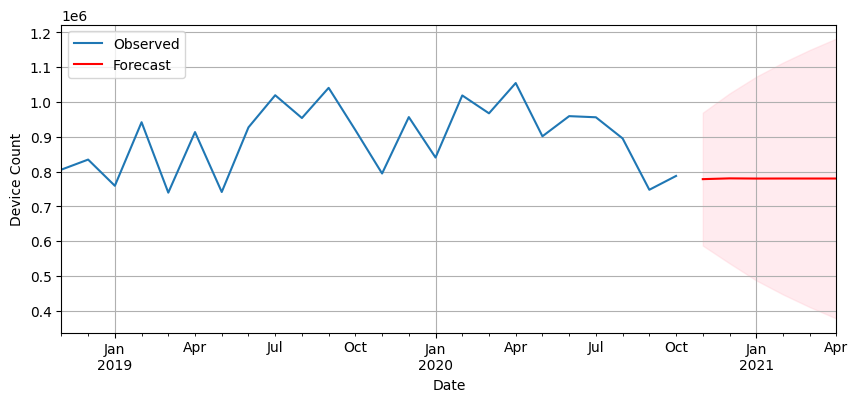

In [20]:
# Predict 6 months into the future
forecast = results.get_forecast(steps=6)
pred_ci = forecast.conf_int()

# Plot
import matplotlib.pyplot as plt

ax = df['DEVICE_COUNT'].plot(label='Observed', figsize=(10, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_xlabel("Date")
ax.set_ylabel("Device Count")
plt.legend()
plt.grid(True)
plt.show()


# Another try

In [48]:

# 2. Binary flags conversion (Y/N → 1/0)
binary_cols = [
    '_2G_FLG', '_3G_FLG', '_4G_FLG',
    'WIFI_FLG', 'BLUETOOTH_FLG',
    'TOUCH_SCREEN_FLG', 'DUAL_SIM_FLG'
]
for col in binary_cols:
    df[col] = df[col].astype(str).str.upper().replace({'Y': 1, 'N': 0})

# 3. Handle GENDER_TYPE_CD
df['GENDER_TYPE_CD'] = df['GENDER_TYPE_CD'].astype(str).str.capitalize()
df['GENDER_TYPE_CD'] = df['GENDER_TYPE_CD'].replace({'X': np.nan})

# 4. Handle AGE_B (categorical)
valid_age_groups = ['<18', '18-25', '26-35', '36-55', '>55']
df['AGE_B'] = df['AGE_B'].where(df['AGE_B'].isin(valid_age_groups), np.nan)

# 5. Normalize string/text columns
string_cols = [
    'MODEL_NAME', 'BRAND_FULL_NAME', 'BRAND_NAME',
    'VENDOR_NAME', 'OS_NAME', 'DEVICE_TYPE',
    'GENDER_TYPE_CD', 'NATIONALITY_NAME',
    'SAUDI_NON_SAUDI'
]
for col in string_cols:
    df[col] = df[col].astype(str).str.strip().str.lower().replace('nan', np.nan)

# 6. Drop rows missing essential values
df = df.dropna(subset=['CAL_DT', 'DEVICE_COUNT', 'MODEL_NAME', 'BRAND_NAME', 'OS_NAME'])

# 7. Drop duplicates
df = df.drop_duplicates()

# 8. Final check
print("Shape after cleaning:", df.shape)
print("Missing values:\n", df.isnull().sum())
print(df.head(3))


Shape after cleaning: (188260, 20)
Missing values:
 CAL_DT              0
MODEL_NAME          0
BRAND_FULL_NAME     0
BRAND_NAME          0
VENDOR_NAME         0
OS_NAME             0
DEVICE_TYPE         0
_2G_FLG             0
_3G_FLG             0
_4G_FLG             0
WIFI_FLG            0
BLUETOOTH_FLG       0
TOUCH_SCREEN_FLG    0
DUAL_SIM_FLG        0
GENDER_TYPE_CD      0
AGE_B               0
NATIONALITY_CD      0
NATIONALITY_NAME    0
SAUDI_NON_SAUDI     0
DEVICE_COUNT        0
dtype: int64
      CAL_DT MODEL_NAME   BRAND_FULL_NAME BRAND_NAME VENDOR_NAME      OS_NAME  \
0 2018-11-30        a59          oppo a59       oppo      google      android   
1 2018-11-30  k116 plus  kechao k116 plus     kechao      kechao  proprietary   
2 2018-11-30      a1000      lenovo a1000     lenovo      google      android   

    DEVICE_TYPE _2G_FLG _3G_FLG _4G_FLG WIFI_FLG BLUETOOTH_FLG  \
0    smartphone       1       1       1        1             1   
1  mobile phone       1       0       

In [49]:
# Ensure datetime format
df['CAL_DT'] = pd.to_datetime(df['CAL_DT'])

# Aggregate monthly
monthly_df = df.groupby(df['CAL_DT'].dt.to_period('M'))['DEVICE_COUNT'].sum().reset_index()
monthly_df['CAL_DT'] = monthly_df['CAL_DT'].dt.to_timestamp()

print(monthly_df.head())


      CAL_DT   DEVICE_COUNT
0 2018-11-01  805607.666667
1 2018-12-01  834456.833333
2 2019-01-01  759121.333333
3 2019-02-01  941791.166667
4 2019-03-01  739432.833333


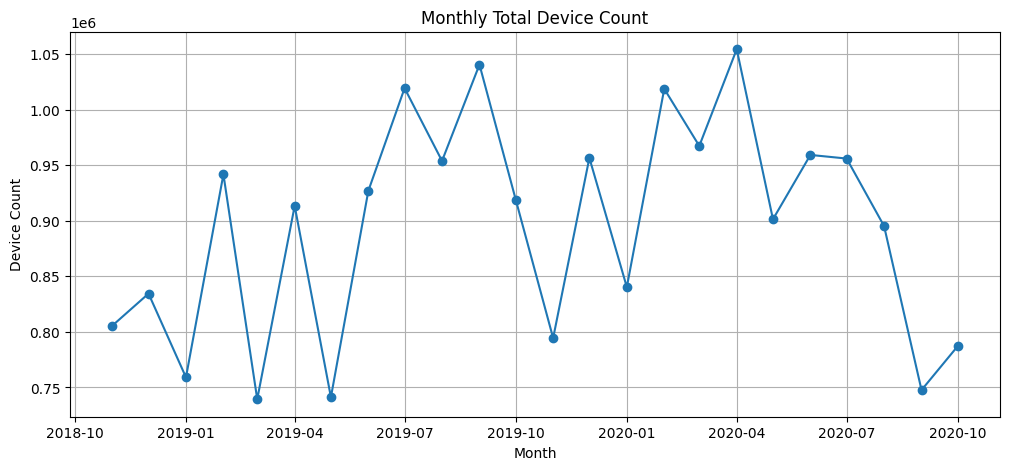

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(monthly_df['CAL_DT'], monthly_df['DEVICE_COUNT'], marker='o')
plt.title('Monthly Total Device Count')
plt.xlabel('Month')
plt.ylabel('Device Count')
plt.grid(True)
plt.show()


In [51]:
import statsmodels.api as sm

# Set index to date
monthly_df.set_index('CAL_DT', inplace=True)

# SARIMA(p,d,q)(P,D,Q,s) → use simple version first
model = sm.tsa.SARIMAX(
    monthly_df['DEVICE_COUNT'],
    order=(1, 1, 1),         # ARIMA (p,d,q)
    seasonal_order=(1, 1, 1, 12),  # seasonal (P,D,Q,s) — 12 months = yearly
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       DEVICE_COUNT   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 16 Jul 2025   AIC                             10.000
Time:                                    10:58:21   BIC                                nan
Sample:                                11-01-2018   HQIC                               nan
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2598         -0        inf      0.000      -0.260      -0.260
ma.L1         -0.1608         -0   

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tools\eval_measures.py:414: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:

In [52]:
# Forecast next 6 months
forecast_steps = 6
pred = results.get_forecast(steps=forecast_steps)

# Get confidence intervals
forecast_df = pred.conf_int()
forecast_df['forecast'] = pred.predicted_mean
forecast_df.index.name = 'CAL_DT'

print(forecast_df)


            lower DEVICE_COUNT  upper DEVICE_COUNT       forecast
CAL_DT                                                           
2020-11-01       378028.827786        8.436902e+05  610859.494772
2020-12-01       517294.722543        1.055481e+06  786387.772218
2021-01-01       353424.856868        9.799175e+05  666671.161305
2021-02-01       497022.178860        1.194903e+06  845962.832311
2021-03-01       412341.312383        1.176349e+06  794344.991742
2021-04-01       469177.687657        1.293691e+06  881434.342515


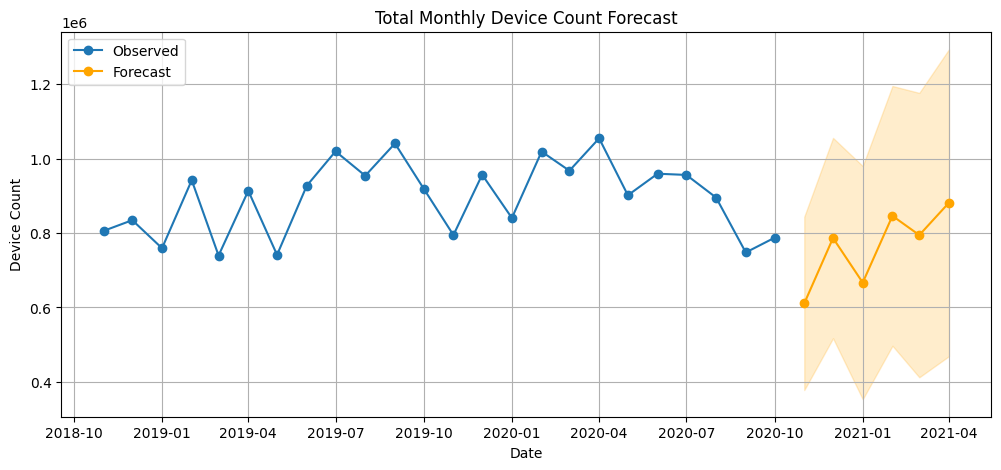

In [53]:
# Plot past + forecast
plt.figure(figsize=(12, 5))
plt.plot(monthly_df.index, monthly_df['DEVICE_COUNT'], label='Observed', marker='o')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='orange', marker='o')

# Confidence intervals
plt.fill_between(forecast_df.index,
                 forecast_df['lower DEVICE_COUNT'],
                 forecast_df['upper DEVICE_COUNT'],
                 color='orange', alpha=0.2)

plt.title('Total Monthly Device Count Forecast')
plt.xlabel('Date')
plt.ylabel('Device Count')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_df['DEVICE_COUNT'], order=(1, 1, 1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:           DEVICE_COUNT   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -302.084
Date:                Wed, 16 Jul 2025   AIC                            610.169
Time:                        11:01:46   BIC                            613.575
Sample:                    11-01-2018   HQIC                           611.025
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2403      0.526     -0.456      0.648      -1.272       0.791
ma.L1          0.0364      0.557      0.065      0.948      -1.056       1.129
sigma2      9.487e+09   3.97e-11   2.39e+20      0.0

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
import pmdarima as pm

auto_model = pm.auto_arima(
    monthly_df['DEVICE_COUNT'],
    start_p=0, start_q=0,
    max_p=2, max_q=2,
    d=1,
    seasonal=False,  # disable seasonal for now
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=609.261, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=610.253, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=609.172, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=607.283, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=612.511, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.046 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -302.642
Date:                Wed, 16 Jul 2025   AIC                            607.283
Time:                        11:01:53   BIC                            608.419
Sample:                    11-01-2018   HQIC                           607.569
                         - 10-01-2020                                         
Co

c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ma.aldawsari\AppData\Local\anaconda3\envs\p\lib\site-packages\sklearn\utils\deprecation